In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
%matplotlib inline
import datetime
from datetime import date
import time
import math
import copy
from collections import Counter

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.use_inf_as_na = True

In [3]:
df_workout = pd.read_csv('workouts data - full.csv',low_memory=False)
df_users = pd.read_csv('user data - full.csv')

In [6]:
df_users.primarytraininggoal.unique()

array(['improve_fitness', 'lose_weight', 'run_farther', 'run_faster',
       'reduce_stress', 'maintain_fitness', nan], dtype=object)

In [262]:
def ConvertEpochToTime(epoch):
    if epoch != epoch:
        return np.nan
#     d = time.strftime("%d %m %Y", time.gmtime(epoch/1000)) #GMT
    return datetime.datetime.utcfromtimestamp(epoch/1000).replace(tzinfo=datetime.timezone.utc)

def AddTimezoneDelay(hoursDelay):
    if hoursDelay  != hoursDelay:
        return datetime.timedelta(hours=0)
    return datetime.timedelta(hours=hoursDelay)

In [263]:
user_list = df_workout.userid.unique()

In [264]:
user_workout_amount = Counter(df_workout.userid)

In [265]:
def divideUsersToLists(user_workout_amount, user_list, lower_thr, upper_thr):
    valid_user_dict = dict()
    for current_user in user_list:
        current_workout = user_workout_amount[current_user]
        if (current_workout >= lower_thr) and (current_workout < upper_thr):
            valid_user_dict[current_user] = current_workout
    return valid_user_dict

In [266]:
# Define BMI Column
height_squere = df_users.height**2
bmi = df_users.weight/(height_squere)
df_users['BMI'] = bmi

gender_male=df_users[df_users.gender == 'male']
gender_female=df_users[df_users.gender == 'female']

df_users.loc[(df_users.gender == 'male') & ((df_users.BMI == 0) | pd.isna(df_users.BMI)), 'BMI']= gender_male.BMI.median()
df_users.loc[(df_users.gender == 'female') & ((df_users.BMI == 0) | pd.isna(df_users.BMI)), 'BMI']= gender_female.BMI.median()


In [274]:
def GetAgeYears(bday_string):
    if bday_string is np.nan:
        return np.nan
    try:
        user_bday = datetime.datetime.strptime(bday_string,"%m/%d/%Y").date()
    except:
        return np.nan
    if user_bday > date.today():
        return np.nan
    age = date.today()-user_bday
    days = age.days
    age = math.floor(days/365)
    if age > 120:
        return 120
    return age

df_users['age_in_years'] = df_users.birthdate.apply(GetAgeYears)

df_users.loc[pd.isna(df_users.age_in_years), 'age_in_years'] = df_users.age_in_years.median()

In [275]:
users_of_10to30_workouts = divideUsersToLists(user_workout_amount, user_list, 10, 30)
users_of_31to50_workouts = divideUsersToLists(user_workout_amount, user_list, 31, 50)
users_of_51to100_workouts = divideUsersToLists(user_workout_amount, user_list, 51, 100)
users_of_100p_workouts = divideUsersToLists(user_workout_amount, user_list, 101, np.inf)

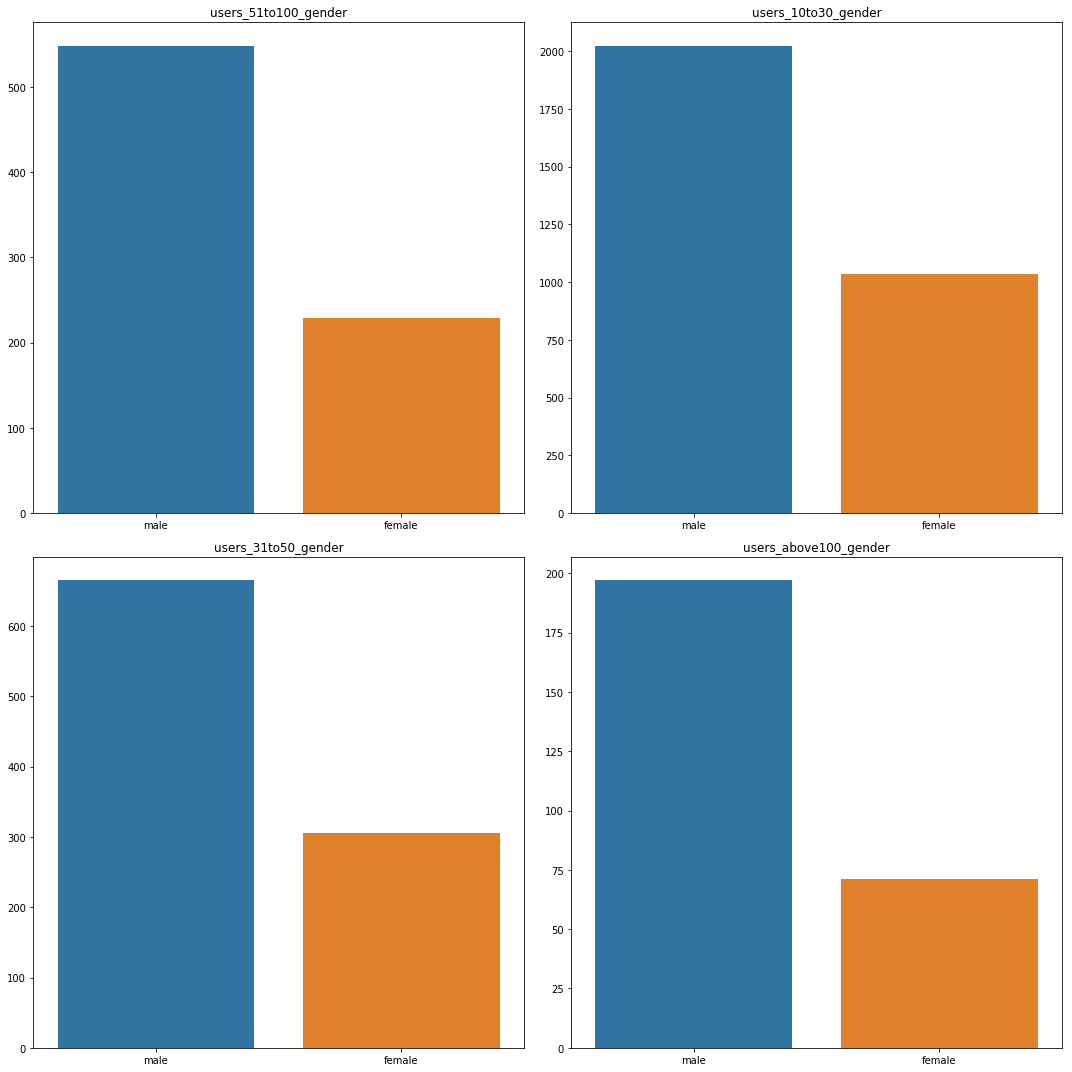

In [293]:
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

gs1 = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])

users_10to30 = df_users.loc[df_users['userid'].isin(users_of_10to30_workouts.keys())]
users_31to50 = df_users.loc[df_users['userid'].isin(users_of_31to50_workouts.keys())]
users_51to100 = df_users.loc[df_users['userid'].isin(users_of_51to100_workouts.keys())]
users_100p = df_users.loc[df_users['userid'].isin(users_of_100p_workouts.keys())]

sns.barplot(x=users_10to30.gender.value_counts().keys(), y=users_10to30.gender.value_counts().values,ax=ax2).set_title('users_10to30_gender')
sns.barplot(x=users_31to50.gender.value_counts().keys(), y=users_31to50.gender.value_counts().values, ax=ax3).set_title('users_31to50_gender')
sns.barplot(x=users_51to100.gender.value_counts().keys(), y=users_51to100.gender.value_counts().values, ax=ax1).set_title('users_51to100_gender')
sns.barplot(x=users_100p.gender.value_counts().keys(), y=users_100p.gender.value_counts().values, ax=ax4).set_title('users_above100_gender')

gs1.tight_layout(fig)

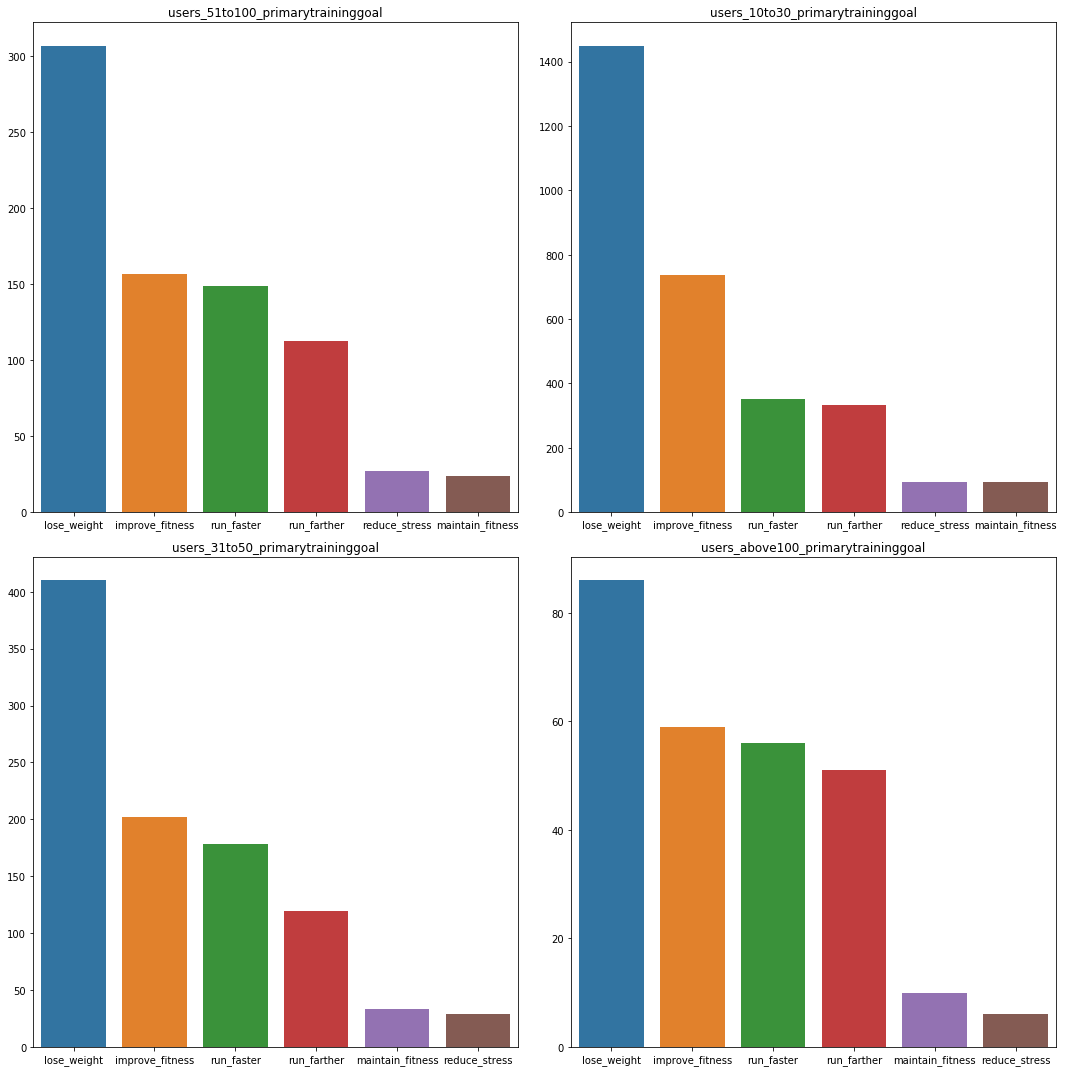

In [294]:
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

gs1 = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])

sns.barplot(x=users_10to30.primarytraininggoal.value_counts().keys(), y=users_10to30.primarytraininggoal.value_counts().values,ax=ax2).set_title('users_10to30_primarytraininggoal')
sns.barplot(x=users_31to50.primarytraininggoal.value_counts().keys(), y=users_31to50.primarytraininggoal.value_counts().values, ax=ax3).set_title('users_31to50_primarytraininggoal')
sns.barplot(x=users_51to100.primarytraininggoal.value_counts().keys(), y=users_51to100.primarytraininggoal.value_counts().values, ax=ax1).set_title('users_51to100_primarytraininggoal')
sns.barplot(x=users_100p.primarytraininggoal.value_counts().keys(), y=users_100p.primarytraininggoal.value_counts().values, ax=ax4).set_title('users_above100_primarytraininggoal')

gs1.tight_layout(fig)

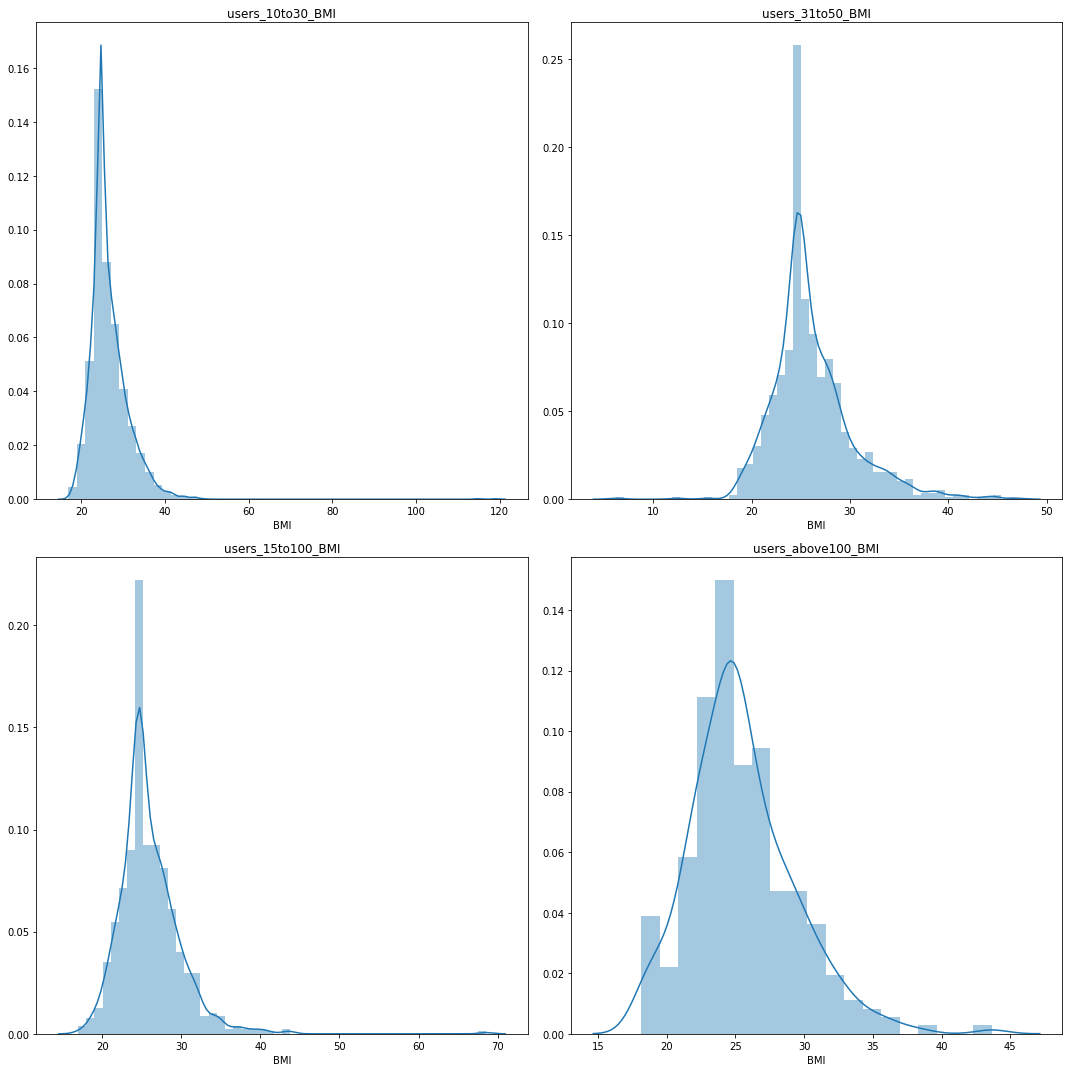

In [291]:
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

gs1 = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])

sns.distplot(users_10to30.BMI, ax=ax1).set_title('users_10to30_BMI')
sns.distplot(users_31to50.BMI, ax=ax2).set_title('users_31to50_BMI')
sns.distplot(users_51to100.BMI, ax=ax3).set_title('users_51to100_BMI')
sns.distplot(users_100p.BMI, ax=ax4).set_title('users_above100_BMI')

gs1.tight_layout(fig)

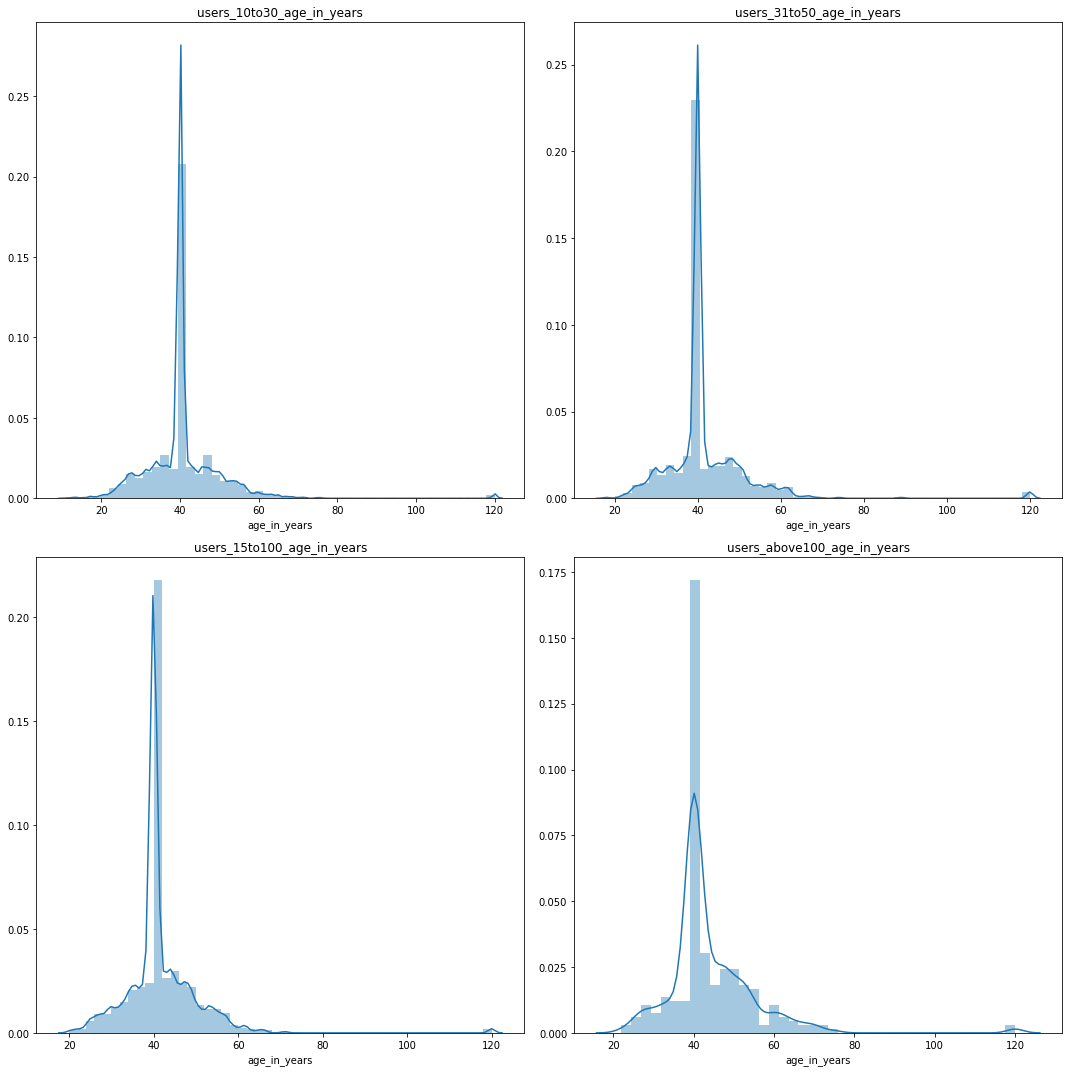

In [290]:
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

gs1 = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])

sns.distplot(users_10to30.age_in_years, ax=ax1).set_title('users_10to30_age_in_years')
sns.distplot(users_31to50.age_in_years, ax=ax2).set_title('users_31to50_age_in_years')
sns.distplot(users_51to100.age_in_years, ax=ax3).set_title('users_51to100_age_in_years')
sns.distplot(users_100p.age_in_years, ax=ax4).set_title('users_above100_age_in_years')

gs1.tight_layout(fig)